In [17]:
from cleanfid import fid 

In [2]:
pwd

'/home/xchen/GANs/DCGAN-PyTorch'

In [25]:
# real_path = './samples/1026_cifar10_10kepochs_hatano/9900/real_images'
fake_path = "samples/1126_mnist_100kepochs_hatano/27900/fake_images"
# score = fid.compute_fid(fake_path, dataset_name='cifar10', dataset_res=32, dataset_split='train')
# score1 = fid.compute_fid(fake_path, real_path)

In [4]:
from models.dcgan import Generator, Discriminator
import torch
from utils.utils import  *

In [5]:
G = Generator().cuda()

In [6]:
PATH = "/home/xchen/GANs/DCGAN-PyTorch/checkpoint/1210_mnist_bs64_10kepochs_hatano/9000_G.pth.tar"

checkpoint = torch.load(PATH)

In [7]:
checkpoint.keys()

dict_keys(['epoch', 'G_state_dict', 'loss'])

In [8]:
G.load_state_dict(checkpoint['G_state_dict'])

<All keys matched successfully>

In [9]:
G.eval()

# fixed noise 
fixed_z = tensor2var(torch.randn(10, 100, 1, 1)) # (10000, 100, 1, 1)

fake_images = G(fixed_z)

In [11]:
# sphinx_gallery_thumbnail_path = "../../gallery/assets/visualization_utils_thumbnail.png"

import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

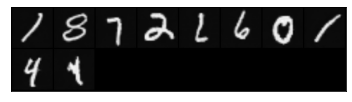

In [16]:
from torchvision.utils import make_grid
from torchvision.io import  read_image


grid = make_grid(fake_images, normalize=True)
show(grid)

In [20]:
fid.make_custom_stats("mnist", "/home/xchen/GANs/DCGAN-PyTorch/samples/1126_mnist_100kepochs_hatano/28000/real_images", mode="clean")

Found 10080 images in the folder /home/xchen/GANs/DCGAN-PyTorch/samples/1126_mnist_100kepochs_hatano/28000/real_images


custom stats: real_images :   0%|          | 0/158 [00:00<?, ?it/s]/home/xchen/anaconda3/lib/python3.7/site-packages/cleanfid/inception_torchscript.py:55: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  features = self.layers.forward(x2, ).view((bs, 2048))
custom stats: real_images : 100%|██████████| 158/158 [03:42<00:00,  1.41s/it]


saving custom FID stats to /home/xchen/anaconda3/lib/python3.7/site-packages/cleanfid/stats/mnist_clean_custom_na.npz
saving custom KID stats to /home/xchen/anaconda3/lib/python3.7/site-packages/cleanfid/stats/mnist_clean_custom_na_kid.npz


In [26]:
score = fid.compute_fid(fake_path, dataset_name="mnist", mode="clean", dataset_split="custom")

print(score)

compute FID of a folder with mnist statistics


/home/xchen/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Found 10080 images in the folder samples/1126_mnist_100kepochs_hatano/27900/fake_images


FID fake_images : 100%|██████████| 315/315 [00:18<00:00, 16.75it/s]


134.0361641604859
